# Data Description

In this dataset we have to predict the **sales price of houses**. It includes homes sold. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains **19** house features plus the price, along with **21613** observations.

The description for the **19** features is given below:


1. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
2. bedrooms :- It determines number of bedrooms in a house.
3. bathrooms :- It determines number of bathrooms in a bedroom of a house.
4. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
5. sqft_lot : It is also the measurement variable which determines square foot of the lot.
6. floors: It determines total floors means levels of house.
7. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
8. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
9. condition : It determines the overall condition of a house on a scale of 1 to 5.
10. grade : It determines overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
11. sqft_above : It determines square footage of house apart from basement.
12. sqft_basement : It determines square footage of the basement of the house.
13. yr_built : It detrmines the date of building of the house.
14. yr_renovated : It detrmines year of renovation of house.
15. zipcode : It determines the zipcode of the location of the house.
16. lat : It determines the latitude of the location of the house.
17. long : It determines the longitude of the location of the house.
18. sqft_living15 : Living room area 
19. sqft_lot15 : lotSize area 

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Now, find if there are any null values. Luckily, there are no null values which helps us in getting the accurate model. We drop the unnecessary columns like 'lat', 'long', 'view'. **There is an outlier in the given data.** Although it is not exactly a outlier, i would like to remove the value so that we can obtain better graph. The **no of bedrooms is '33'** for one observation. I removed that value. 

The **date is in object format, so it is converted into date format** using pandas. Now, the graphs are plotted for better understanding or better analysis. The graphs like relplot, boxplot, heatplot, lineplot, catplot are used for analysis.


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits import mplot3d

In [2]:
#load data
data=pd.read_csv('houseprice_data.csv')

In [3]:
#print top 5 rows
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# data.info()

# Exploratory Data Analysis

In [5]:
data.shape

(21613, 19)

 There are `21613` rows and `19` columns in the given dataset.

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,540182.15879,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,367362.23172,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [9]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
#delete unnecessary column
del data['lat']

In [12]:
data.shape

(21613, 18)

In [13]:
#delete unnecessary column
del data['long']


In [14]:
data.shape

(21613, 17)

In [15]:
#finding value counts of no of bedrooms 
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

###### Although it is not exactly a outlier, i would like to remove the value so that we can obtain better graph. The no of bedrooms is '33' for one observation. I removed that value.

In [16]:
#removing outlier with '33' bedrooms
data=data[data['bedrooms']!=33]

In [17]:
#check if the outlier is removed
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

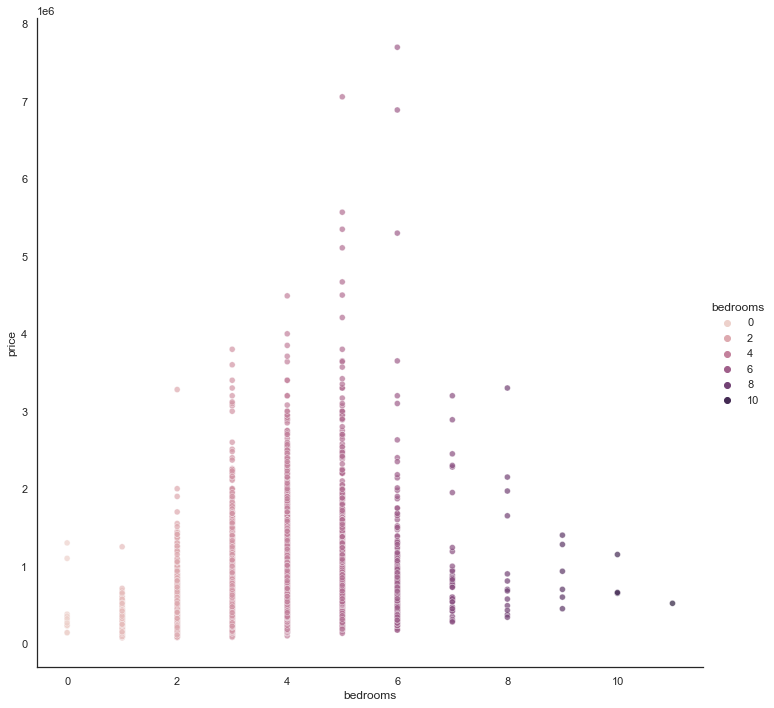

In [18]:
#replot for bedrooms and price
sns.set(style='white')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

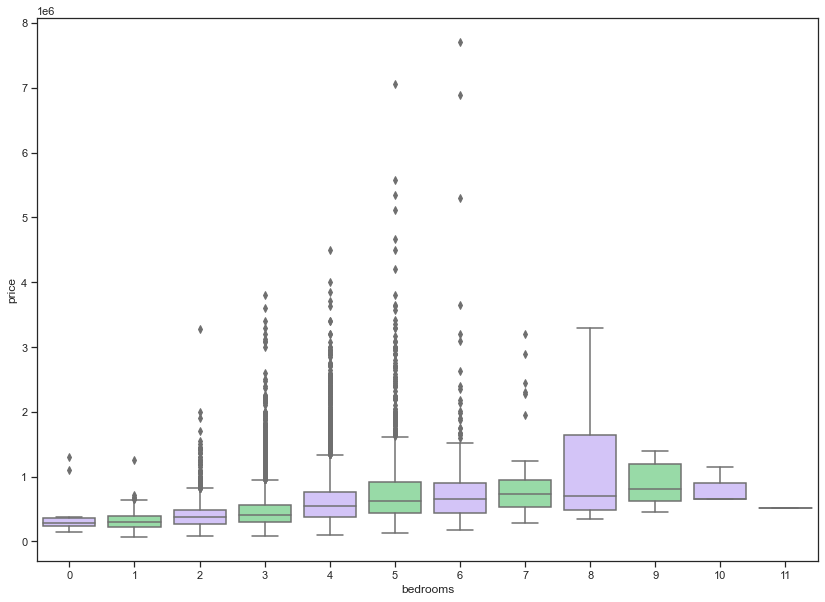

In [19]:
#plot boxplot graph for bedrooms and price
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=data,ax=ax)

<AxesSubplot:>

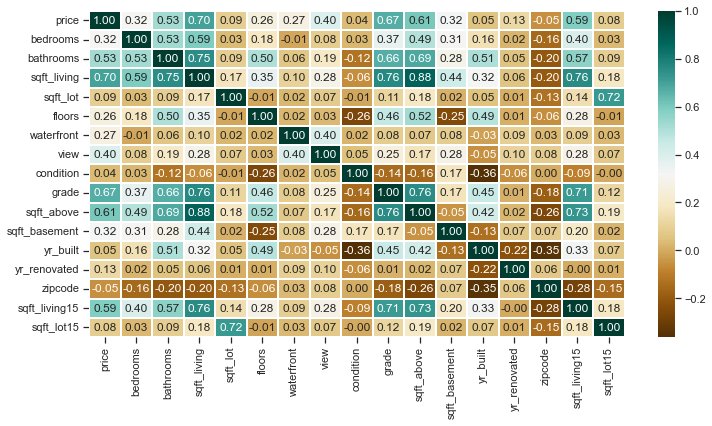

In [20]:

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# Splitting of Data for training and testing

In [21]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [22]:
X=data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']]

In [23]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1340,5650
1,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1690,7639
2,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,2720,8062
3,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1360,5000
4,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,1530,1509
21609,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,1830,7200
21610,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,1020,2007
21611,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,1410,1287


In [24]:
Y=data['price']

In [25]:
Y

0       221900.00000
1       538000.00000
2       180000.00000
3       604000.00000
4       510000.00000
            ...     
21608   360000.00000
21609   400000.00000
21610   402101.00000
21611   400000.00000
21612   325000.00000
Name: price, Length: 21612, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)



Mean Absolute Error (MAE): 151558.5389366532
Mean Squared Error (MSE): 53201110725.66186
R-squared (R2): 0.61709634577984


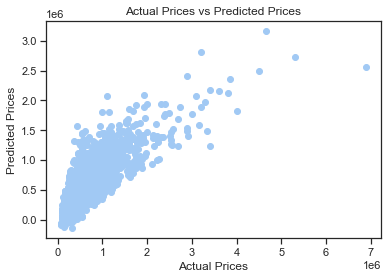

In [33]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualization (Optional)
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

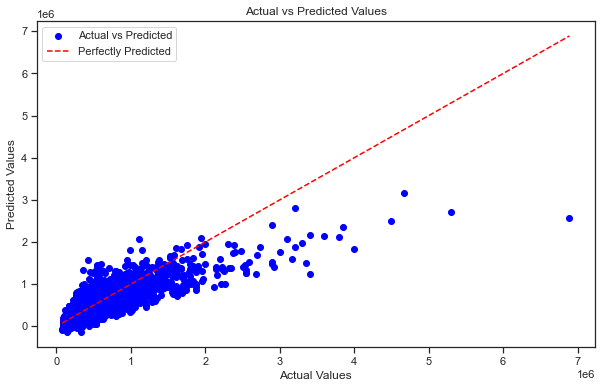

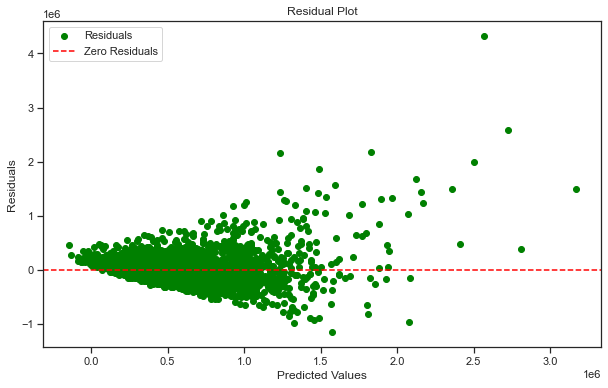

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are NumPy arrays or Pandas series
# If not, you may need to convert them to NumPy arrays or Pandas series for plotting

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Perfectly Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residual plot
residuals = Y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# Normalization basically Standarization

In [122]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [123]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [124]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
2333,3,3.00000,2920,23085,1.50000,0,2,3,7,1540,1380,2270,18180
19642,4,2.50000,2070,4270,2.00000,0,0,3,8,2070,0,2070,4610
8626,3,2.25000,1400,6970,2.00000,0,0,3,8,1400,0,1800,8140
6954,5,3.00000,2190,4900,2.00000,0,0,5,7,1490,700,1370,4606
20242,4,2.50000,2547,4800,2.00000,0,0,3,9,2547,0,2598,4800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25000,1920,9672,2.00000,0,0,4,8,1920,0,1950,10125
8006,3,1.00000,1240,3600,1.50000,0,0,3,7,1240,0,1680,3600
17746,4,1.75000,1460,9750,1.00000,0,0,4,7,1460,0,1820,9840
17932,4,2.75000,2190,2867,1.50000,0,0,5,7,1470,720,1600,3800


In [125]:
X_train_std

array([[-0.40880559,  1.14378613,  0.92143783, ...,  2.45844569,
         0.41867394,  0.20082374],
       [ 0.69209651,  0.49477579, -0.01089589, ..., -0.66216893,
         0.12456685, -0.29305016],
       [-0.40880559,  0.17027062, -0.74579423, ..., -0.66216893,
        -0.27247773, -0.16457743],
       ...,
       [ 0.69209651, -0.47873972, -0.67998244, ..., -0.66216893,
        -0.24306702, -0.10270672],
       [ 0.69209651,  0.81928096,  0.1207277 , ...,  0.96597783,
        -0.56658482, -0.32252973],
       [-0.40880559, -1.45225523, -0.69095107, ...,  0.01622555,
        -1.39008467, -0.17913525]])

In [126]:
X_test_std

array([[-1.50970768, -1.45225523, -1.12969635, ..., -0.66216893,
        -0.56658482, -0.11085909],
       [ 0.69209651,  0.17027062, -0.04380178, ...,  0.78507263,
        -0.14012954, -0.14856383],
       [ 0.69209651,  0.49477579,  0.46075529, ..., -0.66216893,
        -0.74304907, -0.30433246],
       ...,
       [ 1.79299861,  1.14378613,  0.97628099, ..., -0.66216893,
         1.44804875, -0.08469142],
       [-0.40880559,  0.49477579,  1.49180669, ..., -0.66216893,
         1.06570953,  3.64520296],
       [-0.40880559,  0.49477579, -0.55713376, ..., -0.66216893,
        -0.55482053, -0.27248724]])

In [127]:
Y_train

2333    555000.00000
19642   493000.00000
8626    425000.00000
6954    588000.00000
20242   392440.00000
            ...     
5695    625000.00000
8006    390000.00000
17746   427000.00000
17932   637000.00000
13151   394000.00000
Name: price, Length: 16209, dtype: float64

In [73]:
Y_test

3834    349950.00000
1348    450000.00000
20366   635000.00000
16618   369000.00000
20925   246950.00000
            ...     
13042   570000.00000
7148    738000.00000
2747    726000.00000
15565   560000.00000
21238   299000.00000
Name: price, Length: 5403, dtype: float64

# Model training

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [105]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [106]:
Y_pred=lr.predict(X_test_std)

In [107]:
Y_pred

array([354651.85299643, 512653.07753825, 575546.67011535, ...,
       733882.8292402 , 822548.26632211, 440315.70000124])

In [108]:
Y_test

3834    349950.00000
1348    450000.00000
20366   635000.00000
16618   369000.00000
20925   246950.00000
            ...     
13042   570000.00000
7148    738000.00000
2747    726000.00000
15565   560000.00000
21238   299000.00000
Name: price, Length: 5403, dtype: float64

In [109]:
from sklearn.metrics import mean_absolute_error,r2_score

In [110]:
mean_absolute_error(Y_test,Y_pred)

151558.53893665885

In [111]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16618,4,2.50000,2370,6557,2.00000,0,0,3,9,2370,0,2370,7378
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,3,1.75000,2580,40392,1.00000,0,0,3,9,1390,1190,2460,46173
7148,3,1.75000,1520,5500,1.50000,0,0,5,7,1520,0,2310,5500
2747,5,3.00000,2970,10335,2.00000,0,0,3,9,2970,0,2970,10335
15565,3,2.50000,3440,103672,2.00000,0,0,3,9,3440,0,2710,112820


In [112]:
X_test.loc[7148]

bedrooms           3.00000
bathrooms          1.75000
sqft_living     1520.00000
sqft_lot        5500.00000
floors             1.50000
waterfront         0.00000
view               0.00000
condition          5.00000
grade              7.00000
sqft_above      1520.00000
sqft_basement      0.00000
sqft_living15   2310.00000
sqft_lot15      5500.00000
Name: 7148, dtype: float64

In [113]:
r2_score(Y_test,Y_pred)

0.6170963457798495

# Lets predict for Single House

In [129]:
new_house=[[3,3,1220,7000,1,0,1,4,6,1500,1,3000,4000]]

In [130]:
new_house_std=std.transform(new_house)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [131]:
new_house_std

array([[-0.40880559,  1.14378613, -0.9432296 , -0.19107754, -0.91713785,
        -0.08780117,  0.98599801,  0.90597365, -1.41408671, -0.34945443,
        -0.65990762,  1.49216482, -0.31525083]])

In [132]:
int(lr.predict(new_house_std))

320058

# Is there a way of visualising your model? (Possibly just one or two input/feature variable(s).)

 Yes, you can visualize the model's predictions using scatter plots when dealing with one or two input variables. Scatter plots are helpful for visualizing the relationship between the features and the target variable. Here's how you can do it:

Visualizing a Single Input Variable:
Let's assume you want to visualize the relationship between the number of bedrooms and house prices.

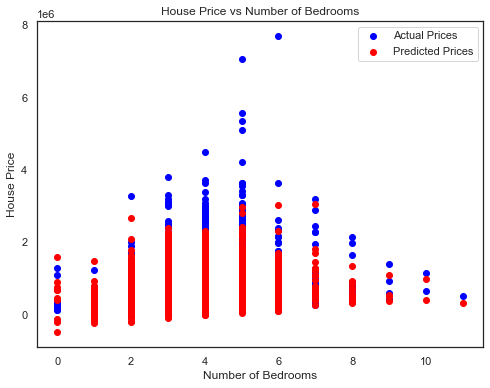

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train['bedrooms'], Y_train, color='blue', label='Actual Prices')
plt.scatter(X_train['bedrooms'], model.predict(X_train), color='red', label='Predicted Prices')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('House Price vs Number of Bedrooms')
plt.legend()
plt.show()


# How will you assess the effectiveness of the model?

**A regression model's efficacy is determined by analyzing its performance with a variety of metrics. The following are the main indicators that are frequently used to evaluate a regression model's efficacy**:

1. **The MAE (Mean Absolute Error):**
   - The mean absolute error (MAE) between the actual and predicted values is the average of these errors. It provides a clear indication of the average deviation between the model's predictions and the actual values.
   y_{\text{actual}} - y_{\text{predicted}}| \( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n})
   - A lower MAE denotes a better model fit.

2. **The MSE (mean square error):**
   - The mean squared error (MSE) between the actual and predicted values is represented. Compared to MAE, it penalizes bigger errors more severely.
   - Formula: (y_{\text{actual}} - y_{\text{predicted}})^2 \(\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \)
   Additionally, a lower MSE denotes a better fit and offers more weight to large errors compared to MAE.

3. **RMSE, or Root Mean Squared Error:**
   - The target variable's unit is the same for the readable error metric provided by RMSE, which is the square root of MSE.
   - Equation: \(\text{RMSE} = \sqrt{\text{MSE}})
   - Compared to MSE, a lower RMSE denotes a better fit and is simpler to interpret.

4. **Score in R-squared (R²)**
   The percentage of variance in the dependent variable (target) that can be predicted from the independent variables (features) is represented by the R2 score.
   The R2 score has a range of 0 to 1. A higher fit, or one where the model explains a greater percentage of the variance in the target variable, is indicated by a score that is closer to 1.

You should take into account all of these metrics when evaluating the model's efficacy. Utilizing a combination of these metrics is a good way to get a comprehensive understanding of the model's performance. Additionally, visualizations such as scatter plots comparing actual vs. predicted values can provide valuable insights into how well the model captures the underlying patterns in the data. Furthermore, domain-specific knowledge and context are crucial for interpreting these metrics effectively.

# Include as many features as you can. Does the model improve?

**There are possible advantages and difficulties when you add more features to a regression model:**

Advantages: 
1. **More Information:** Adding features to the model gives it access to more data, which may help it identify more intricate relationships in the information.

2. **Improved Accuracy**: Adding pertinent features can result in predictions that are more accurate, particularly if those features have a high correlation with the target variable.
3. **Better Generalization:** The model's capacity to generalize to previously undiscovered data can be improved by carefully choosing a variety of features.

The first challenge is **overfitting:** Overfitting may result from the inclusion of unnecessary or excessive features. Because overfit models memorize the noise in the training set instead of learning the underlying patterns, they perform well on training data but poorly on unseen data.

To determine whether the model improves with the inclusion of more features, you should follow these steps:

1. **Feature Selection:** Use techniques like correlation analysis or feature importance scores from the initial model to identify the most relevant features. Focus on features that have a strong correlation with the target variable.

2. **Feature Engineering:** Create new meaningful features from existing ones. Sometimes, combining or transforming existing features can provide valuable information to the model.

3. **Regularization Techniques:** If you include many features, consider using regularization techniques like Lasso (L1 regularization) or Ridge (L2 regularization) to penalize irrelevant features. These techniques can help prevent overfitting.

4. **Evaluate Metrics:** Compare the evaluation metrics (MAE, MSE, RMSE, R²) with and without additional features. If the metrics improve on the test data and the model generalizes well, it suggests that the inclusion of more features is beneficial.



# How could you make further improvements?


 **Certainly, there are several ways to make further improvements to your regression model:**

1. **Feature Engineering:** Create new features that might have a strong correlation with the target variable. 

2. **Polynomial Regression:** If the relationship between the features and the target variable is nonlinear, consider using polynomial regression.

3. **Regularization:** Apply regularization techniques like Lasso (L1 regularization) or Ridge (L2 regularization) to prevent overfitting. 
4. **Outlier Handling:** Revisit and carefully handle outliers in the data. Outliers can significantly impact regression models. You can remove outliers or transform them using techniques like winsorizing or log transformations.

5. **Feature Scaling:** Standardize or normalize features to ensure they are on the same scale. Algorithms like linear regression are sensitive to the scale of input features.

6. **Cross-Validation:** Use techniques like k-fold cross-validation to get a better estimate of the model's performance. 

Continuous iteration and experimentation are key. Try different approaches, evaluate their performance rigorously, and iterate based on the results to gradually improve your regression model.

# What can you conclude about your model?


 **I don't have access to the specific data or the results of your model since I cannot execute code or analyze real-time data. However, I can guide you on what conclusions you can draw based on the evaluation metrics and analysis of your regression model.**

1. **Interpretation of Metrics:**
   - **Mean Absolute Error (MAE):** 
   - **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** 
   - **R-squared (R²) Score:** 
2. **Comparative Analysis:** 
- Examine performance metrics of the model both before and after adjustments are made. The model has been improved if the MAE, MSE, RMSE, or R2 score shows a discernible improvement.
   . Make a visual comparison between the predicted and actual values as well. An easy way to see how well the model predicts house prices across various ranges is to look at a scatter plot.

3. **Limitation and Improvement Needs:** - Determine the model's shortcomings. It's critical to understand these limitations, for instance, if the model is missing some patterns or outliers.
   - Take into account areas that could use more work in light of the analysis. Should certain features not be making a substantial contribution, you may want to reevaluate their inclusion or look into more advanced feature engineering methods.
4. **Future Steps:**
   - Based on the conclusions, outline the future steps. This could involve further model refinement, gathering additional data, or exploring more advanced modeling techniques if the current model does not meet the desired level of accuracy.